In [2]:
import amcts
import numpy as np

# unfortunately experiments are not determinicstic due to AMCTS nature...
np.random.seed(0)

mip_file = 'neos16.mps.gz'

# Mean score, CPLEX branching
mcts = amcts.MCTS(
    mip_filename=mip_file,
    n_jobs=8,
    max_depth=0,  # tree depth 0 -> only root statistics (mean score)
    rollout_strategy='default',  # default CPLEX branching
)
mcts.run(n_iters=10)


[p] rollout score: 939
[t] 1 simulations so far
[p] rollout score: 1511
[t] 2 simulations so far
[p] rollout score: 1819
[t] 3 simulations so far
[p] rollout score: 2231
[p] rollout score: 2491
[t] 4 simulations so far
[t] 5 simulations so far
[p] rollout score: 2941
[t] 6 simulations so far
[p] rollout score: 2205
[t] 7 simulations so far
[p] rollout score: 2527
[t] 8 simulations so far
[p] rollout score: 5977
[t] 9 simulations so far
[p] rollout score: 6899
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[t] 10 simulations so far


In [3]:
_, _, cplex_score, cplex_visits = mcts.get_action_info()
print("CPLEX branching mean score: {} (over {} runs)".format(
    cplex_score, cplex_visits))

CPLEX branching mean score: 2954.0 (over 10 runs)


In [7]:
# Mean score, random branching
mcts = amcts.MCTS(
    mip_filename=mip_file,
    n_jobs=8,
    max_depth=0,  # tree depth 0 -> only root statistics (mean score)
    rollout_strategy='random',  # random branching
)
mcts.run(n_iters=10)


[p] rollout score: 5551
[t] 1 simulations so far
[p] rollout score: 6447
[t] 2 simulations so far
[p] rollout score: 8085
[t] 3 simulations so far
[p] rollout score: 8823
[t] 4 simulations so far
[p] rollout score: 29297
[t] 5 simulations so far
[p] rollout score: 30089
[t] 6 simulations so far
[p] rollout score: 36869
[t] 7 simulations so far
[p] rollout score: 61491
[t] 8 simulations so far
[p] rollout score: 96783
[t] 9 simulations so far
[p] rollout score: 210209
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[p] stopping.
[t] 10 simulations so far


In [8]:
_, _, rdm_score, rdm_visits = mcts.get_action_info()
print("Random branching mean score: {} (over {} runs)".format(
    rdm_score, rdm_visits))

Random branching mean score: 49364.3984375 (over 10 runs)


In [4]:
# UCB bandit, CPLEX branching
mcts = amcts.MCTS(
    mip_filename=mip_file,
    n_jobs=8,
    max_depth=1,  # tree depth 1 -> only first branching decision explored
    rollout_strategy='default',  # default CPLEX branching afterwards
    score_limit=2*cplex_score,  # impose early stopping
)
mcts.run(n_iters=200, c=np.sqrt(2))


[p] rollout score: 1489
[t] 1 simulations so far
[p] rollout score: 2753
[t] 2 simulations so far
[p] rollout score: 1515
[t] 3 simulations so far
[p] rollout score: 4357
[t] 4 simulations so far
[p] rollout score: 4901
[t] 5 simulations so far
[p] rollout score: 5005
[t] 6 simulations so far
[p] rollout score: 5909
[p] rollout score: 5909
[t] 7 simulations so far
[t] 8 simulations so far
[p] rollout score: 5909
[t] 9 simulations so far
[p] rollout score: 3993
[t] 10 simulations so far
[p] rollout score: 2309
[t] 11 simulations so far
[p] rollout score: 2909
[t] 12 simulations so far
[p] rollout score: 2657
[t] 13 simulations so far
[p] rollout score: 5909
[t] 14 simulations so far
[p] rollout score: 4613
[t] 15 simulations so far
[p] rollout score: 2741
[t] 16 simulations so far
[p] rollout score: 5909
[t] 17 simulations so far
[p] rollout score: 5909
[t] 18 simulations so far
[p] rollout score: 5909
[t] 19 simulations so far
[p] rollout score: 685
[t] 20 simulations so far
[p] rollou

192
Variable IDs: [356 346 105 374 133 354 329  99 341 118 327 344 321 343 355 151 282 296
 271 358  95 340 345 289 317 259 123 357 352 364 334 359 280 369  96 127
 325 353]
Number of visits: [ 8  4  5  5  4  5  3  6  4  5  4  3  3  8  5  3  7  4  4  4  5  6  6  5
  8  5  3  3  6  6  3  3  5 10  6  9  5  4]
Scores: [2547.25       5354.5        4649.79980469 4024.19995117 4734.
 3898.19995117 5807.66650391 3911.66674805 4787.5        4490.20019531
 4837.5        5909.         5909.         3023.5        3978.19995117
 5751.         2899.85717773 4658.5        4440.         4600.5
 4271.79980469 3742.66674805 3194.33325195 4065.         3003.5
 4667.         5909.         5505.         3585.66674805 3644.66674805
 5909.         5661.         4184.60009766 2066.80004883 3949.
 2541.22216797 4474.60009766 5111.        ]


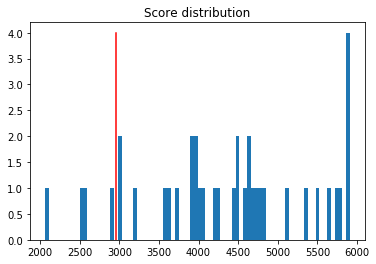

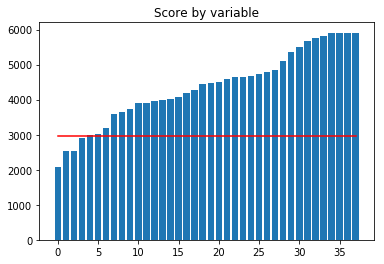

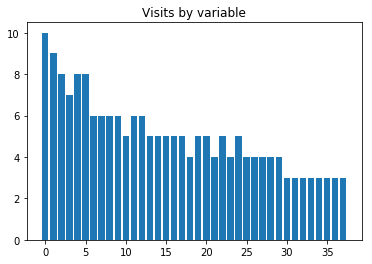

avg. CPLEX score 2954.0
min. MCTS score 2066.800048828125
max. MCTS score 5909.0


In [8]:
vars, priors, scores, visits = mcts.get_state_info()

print(visits.sum())
print("Variable IDs: {}".format(vars))
print("Number of visits: {}".format(visits))
print("Scores: {}".format(scores))

%matplotlib inline
import matplotlib.pyplot as plt

y, x, _ = plt.hist(scores, bins=80)
plt.title("Score distribution")
plt.plot((cplex_score, cplex_score), (0, y.max()), 'red')
plt.show()

s_order = np.argsort(scores)

plt.bar(range(len(scores)), scores[s_order])
plt.title("Score by variable")
plt.plot((0, len(scores)-1), (cplex_score, cplex_score), 'red')
plt.show()

plt.bar(range(len(scores)), visits[s_order])
plt.title("Visits by variable")
plt.show()

print("avg. CPLEX score {}".format(cplex_score))
print("min. MCTS score {}".format(scores.min()))
print("max. MCTS score {}".format(scores.max()))